# Import Library

In [1]:
from skimage import transform
from skimage import data
from skimage import io 
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random
import tensorflow as tf
from PIL import Image

C:\Users\smart\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Read Data

In [3]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) for f in os.listdir(label_directory)]
        for f in file_names:
            images.append(io.imread(f))
            labels.append(ord(d))
    return images, labels

#ROOT_PATH = r"C:\Users\smart\Desktop\AI\Projects\Sign Language"
train_data_directory = os.path.join(r"C:\Users\smart\Desktop\AI\Projects\Sign Lanuage\train")

images, labels = load_data(train_data_directory)

In [83]:
labels

[65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,


In [96]:
width = 28
height = 28
# Resize images to a common size
target_size = (width, height)  # Specify the desired width and height
images_resized = [Image.fromarray(image).resize(target_size) for image in images]

# Convert resized images to NumPy array
images_array = np.array([np.array(image) for image in images_resized])
labels_array = np.array(labels)

# Print the number of `images`'s elements
print("Total number of images:",images_array.size)
# Count the number of labels
print("Total No of classes:",len(set(labels_array)))
print("Label Array: ",[chr(labels) for labels in set(labels)])

Total number of images: 11411904
Total No of classes: 24
Label Array:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [5]:
img = images_array[1]
img

array([[[122, 130, 138],
        [134, 142, 152],
        [139, 149, 157],
        ...,
        [135, 146, 154],
        [129, 140, 148],
        [117, 130, 138]],

       [[133, 142, 150],
        [141, 151, 160],
        [147, 157, 165],
        ...,
        [142, 154, 162],
        [134, 148, 155],
        [125, 136, 145]],

       [[139, 149, 158],
        [147, 157, 165],
        [153, 162, 170],
        ...,
        [147, 159, 167],
        [140, 153, 161],
        [131, 143, 152]],

       ...,

       [[153, 166, 174],
        [162, 172, 178],
        [167, 176, 182],
        ...,
        [163, 178, 182],
        [157, 172, 175],
        [146, 162, 163]],

       [[149, 161, 168],
        [158, 168, 173],
        [162, 173, 176],
        ...,
        [159, 175, 176],
        [153, 168, 173],
        [141, 158, 159]],

       [[139, 154, 156],
        [151, 163, 168],
        [157, 168, 173],
        ...,
        [153, 169, 170],
        [147, 163, 165],
        [136, 152, 152]]

In [34]:
img.shape

(28, 28, 3)

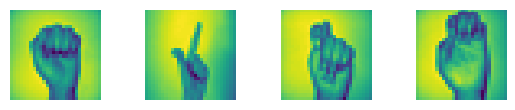

In [35]:
# Determine the (random) indexes of the images that you want to see 
hand_signs = [12,2225,4000,1111]

# Fill out the subplots with the random images that you defined 
for i in range(len(hand_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images_array[hand_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

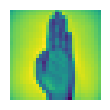

shape: (28, 28), min: 0.09723294117647058, max: 0.7570054901960784


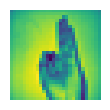

shape: (28, 28), min: 0.13998156862745095, max: 0.6682082352941178


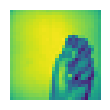

shape: (28, 28), min: 0.05742117647058824, max: 0.6600823529411765


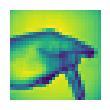

shape: (28, 28), min: 0.1336956862745098, max: 0.7519976470588235


In [36]:
# Determine the (random) indexes of the images
hand_signs = [300, 1250, 2650, 3000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(hand_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images_array[hand_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images_array[hand_signs[i]].shape, 
                                                  images_array[hand_signs[i]].min(), 
                                                  images_array[hand_signs[i]].max()))

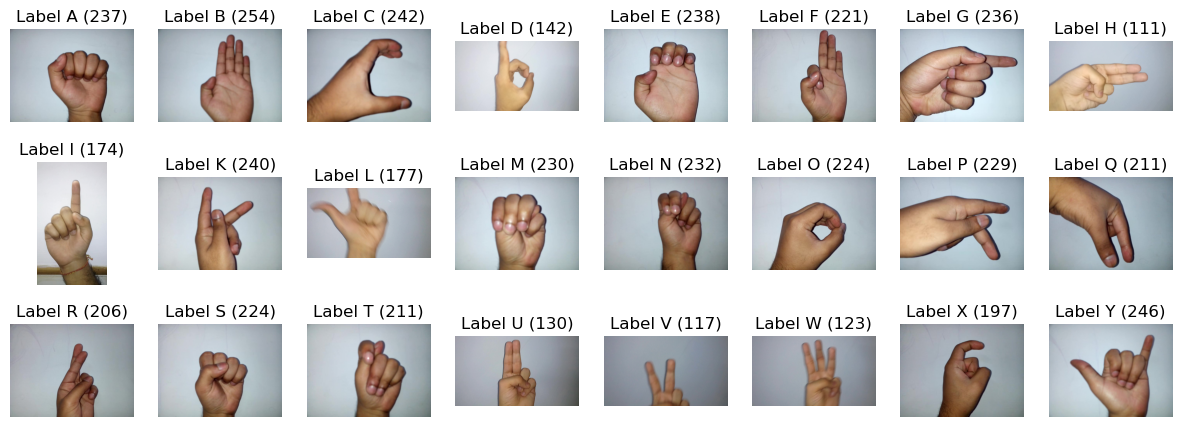

In [16]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(chr(label), labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

# Feature Exteraction

In [39]:
def reshape_image_to_three_dimention(image):
    """
    Reshape a grayscale image to RGB format.

    Parameters:
        image (numpy.ndarray): The input grayscale image with shape (height, width).

    Returns:
        numpy.ndarray: The reshaped RGB image with shape (height, width, 3).
    """
    # Add a new dimension for the channel
    image_rgb = np.expand_dims(image, axis=-1)
    # Repeat the values along the new dimension to create three channels
    image_rgb = np.repeat(image_rgb, 3, axis=-1)
    return image_rgb

# Assuming grayscale_image is an image with shape (28, 28)
two_dimention_image = images_array 
three_dimention_image = reshape_image_to_three_dimention(two_dimention_image)
print("Two Dimention image shape:", two_dimention_image.shape)
print("RGB image shape:", three_dimention_image.shape)

Two Dimention image shape: (4852, 28, 28)
RGB image shape: (4852, 28, 28, 3)


# Image Conversion to Grayscale

In [40]:
images32 = rgb2gray(np.array(three_dimention_image))

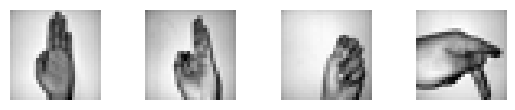

(4852, 28, 28)


In [41]:
for i in range(len(hand_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[hand_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
plt.show()

print(images32.shape)

# Model

In [92]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming images32 is your grayscale images array and labels is the corresponding labels array

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images32, labels_array, test_size=0.2, random_state=42)

# Define input layer for images
x = tf.keras.Input(shape=(28, 28), dtype=tf.float32)

# Define input layer for labels
y = tf.keras.Input(shape=(), dtype=tf.int32)

# Flatten the input images
images_flat = layers.Flatten()(x)

# Fully connected layer with ReLU activation function
dense1 = layers.Dense(128, activation='relu')(images_flat)

# Output layer with softmax activation function for classification
logits = layers.Dense(10, activation='softmax')(dense1)

# Define the model
model = models.Model(inputs=x, outputs=logits)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}


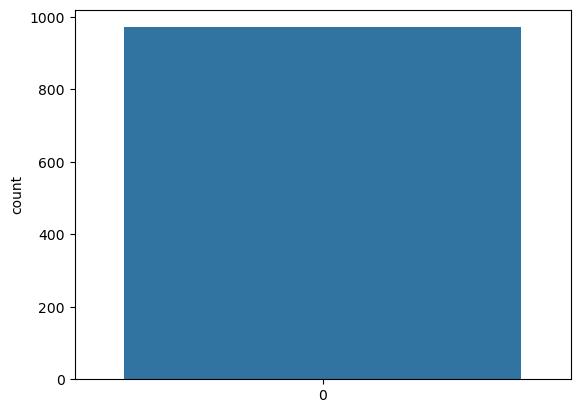

In [121]:
import pandas as pd
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_val
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [112]:
import numpy as np

# Convert list of labels to NumPy array
y_train = np.array(y_train)
y_val = np.array(y_val)

# Convert labels to the range [0, 9]
y_train = y_train % 8
y_val = y_val % 8


In [113]:
labels_array

array([65, 65, 65, ..., 89, 89, 89])

In [114]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val),
                    batch_size=32)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

Epoch 1/50
122/122 [==============================] - 0s 4ms/step - loss: 0.4410 - accuracy: 0.8797 - val_loss: 0.5080 - val_accuracy: 0.8290
Epoch 2/50
122/122 [==============================] - 0s 3ms/step - loss: 0.3171 - accuracy: 0.9106 - val_loss: 0.3731 - val_accuracy: 0.8929
Epoch 3/50
122/122 [==============================] - 0s 3ms/step - loss: 0.2747 - accuracy: 0.9222 - val_loss: 0.4527 - val_accuracy: 0.8424
Epoch 4/50
122/122 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.9315 - val_loss: 0.3028 - val_accuracy: 0.9073
Epoch 5/50
122/122 [==============================] - 0s 3ms/step - loss: 0.2292 - accuracy: 0.9446 - val_loss: 0.3399 - val_accuracy: 0.8980
Epoch 6/50
122/122 [==============================] - 0s 3ms/step - loss: 0.2283 - accuracy: 0.9400 - val_loss: 0.2955 - val_accuracy: 0.9125
Epoch 7/50
122/122 [==============================] - 0s 4ms/step - loss: 0.2382 - accuracy: 0.9286 - val_loss: 0.3176 - val_accuracy: 0.8939
Epoch 

# Evaluation

In [115]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Make predictions on test data
predictions = model.predict(X_val)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

31/31 [==============================] - 0s 2ms/step - loss: 0.1348 - accuracy: 0.9701
Validation Loss: 0.1348, Validation Accuracy: 0.9701
31/31 [==============================] - 0s 2ms/step - loss: 0.1348 - accuracy: 0.9701
Test Loss: 0.1348, Test Accuracy: 0.9701


In [129]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = np.array([images32[i] for i in sample_indexes])
sample_labels = [labels[i] for i in sample_indexes]

# Convert sample_images to the appropriate data type (float32) and normalize if necessary
sample_images = sample_images.astype('float32') / 255.0  # Assuming images are normalized

# Run predictions
predicted = model.predict(sample_images)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predicted, axis=1)


# Print the predicted probabilities for each sample image
for i in range(len(sample_images)):
    print(f"Sample {i+1}: Predicted probabilities:", predicted[i])

# Print the model's architecture
model.summary()

1/1 [==============================] - 0s 30ms/step
Sample 1: Predicted probabilities: [0.04834656 0.0891488  0.02259925 0.0567099  0.2641519  0.01574865
 0.04966478 0.31083843 0.08890922 0.05388247]
Sample 2: Predicted probabilities: [0.04739288 0.09638922 0.02325752 0.05536835 0.2553147  0.01473683
 0.04966582 0.315701   0.08835839 0.05381529]
Sample 3: Predicted probabilities: [0.04856351 0.09134089 0.02275715 0.05561642 0.26356676 0.01596289
 0.04834955 0.31021336 0.0898084  0.05382103]
Sample 4: Predicted probabilities: [0.04710045 0.09613772 0.02312941 0.05538291 0.25519842 0.0146535
 0.04984654 0.31685996 0.08797193 0.05371914]
Sample 5: Predicted probabilities: [0.04800359 0.09087996 0.02351318 0.05867776 0.25841883 0.01584279
 0.04780185 0.31191146 0.09049311 0.05445752]
Sample 6: Predicted probabilities: [0.04795531 0.09007005 0.02465065 0.06024127 0.2632391  0.01579387
 0.04884856 0.3023341  0.0919413  0.05492583]
Sample 7: Predicted probabilities: [0.04859001 0.08971833 0.0

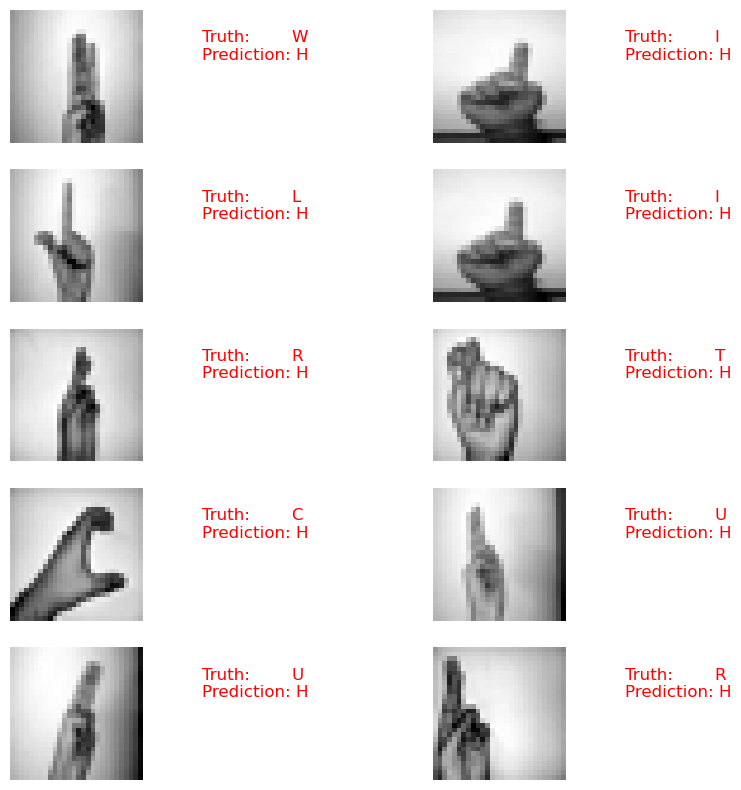

In [130]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = np.argmax(predicted[i])  # Get the index with the highest probability
    plt.subplot(5, 2, 1 + i)
    plt.axis('off')
    color = 'green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(chr(truth), chr(prediction + 65)),
             fontsize=12, color=color)  # Assuming class labels are 0 to 9 and are converted to ASCII
    plt.imshow(sample_images[i], cmap='gray')

plt.show()